In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy 

%matplotlib inline

# loading the data and data inspection

In [5]:
raw = pd.read_csv('credit-card-data.csv', index_col= 'CUST_ID')

In [6]:
raw.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
CUST_ID,,,,,,,,,,,,,,,,,
C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [7]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8950 entries, C10001 to C19190
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   int64  
 11  PURCHASES_TRX                     8950 non-null   int64  
 12  CRED

In [8]:
raw.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [10]:
raw.skew()

BALANCE                              2.393386
BALANCE_FREQUENCY                   -2.023266
PURCHASES                            8.144269
ONEOFF_PURCHASES                    10.045083
INSTALLMENTS_PURCHASES               7.299120
CASH_ADVANCE                         5.166609
PURCHASES_FREQUENCY                  0.060164
ONEOFF_PURCHASES_FREQUENCY           1.535613
PURCHASES_INSTALLMENTS_FREQUENCY     0.509201
CASH_ADVANCE_FREQUENCY               1.828686
CASH_ADVANCE_TRX                     5.721298
PURCHASES_TRX                        4.630655
CREDIT_LIMIT                         1.522464
PAYMENTS                             5.907620
MINIMUM_PAYMENTS                    13.622797
PRC_FULL_PAYMENT                     1.942820
TENURE                              -2.943017
dtype: float64

In [55]:
def draw_df(df, plot_function = 'sns.boxplot'):
    '''
    plot univariate data
    '''
    ncols = 4
    nrows = len(df.columns) // ncols + 1
    fig, axes = plt.subplots(nrows, ncols, figsize = (15,15))
    r = 0
    c = 0
    for i in range(len(df.columns)):
        eval(plot_function)(data = df, y = df.columns[i],ax= axes[r,c])
        c += 1
        if c == ncols:
            c = 0
            r += 1
    plt.tight_layout()

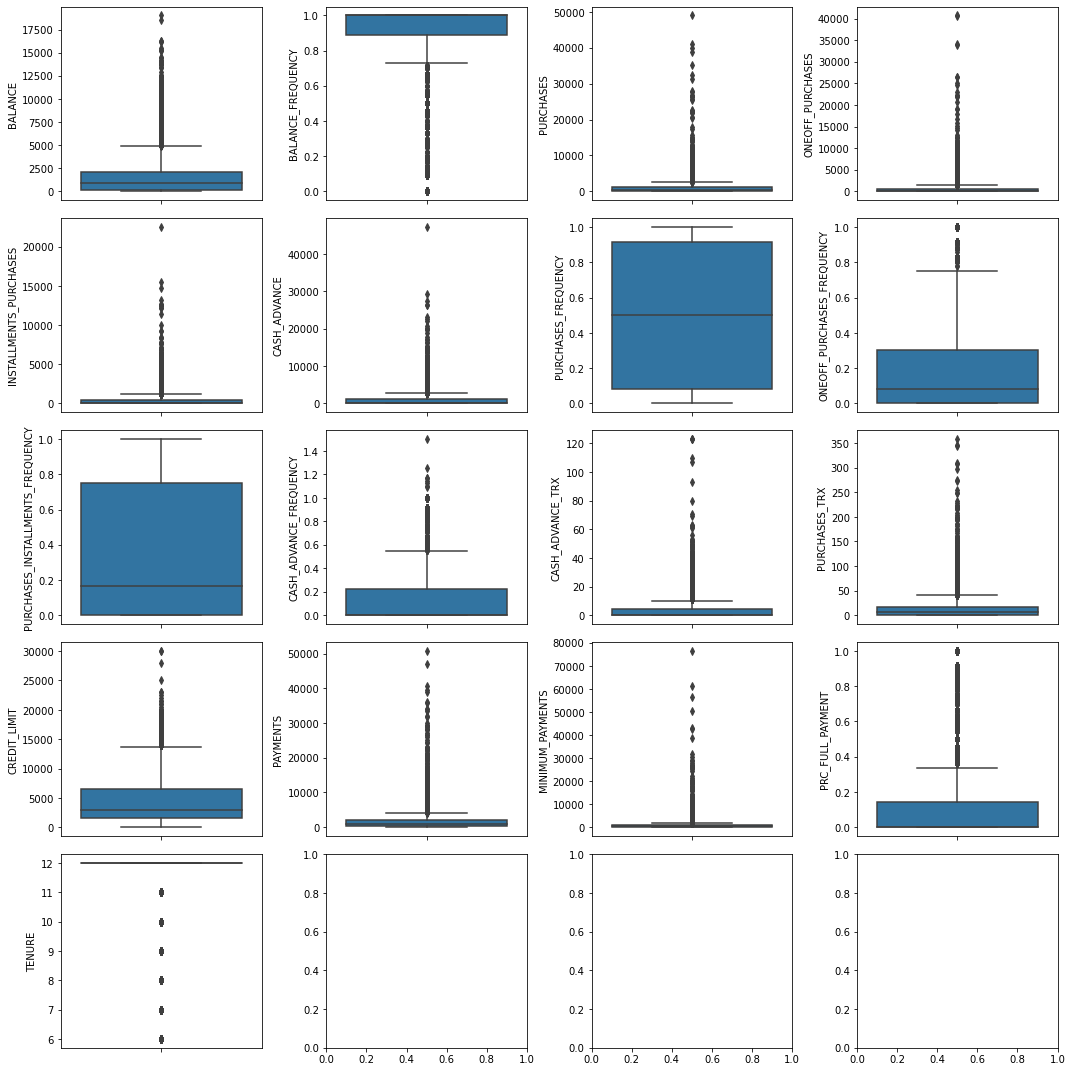

In [56]:
draw_df(raw)

In [40]:
raw['TENURE']

CUST_ID
C10001    12
C10002    12
C10003    12
C10004    12
C10005    12
          ..
C19186     6
C19187     6
C19188     6
C19189     6
C19190     6
Name: TENURE, Length: 8950, dtype: int64

___

### problems 
### 1- we have nulls values (impute with median)
### 2- we have high skewness (use natural log transformation, sqrt transformation)
### 3- outliers (use isolation forest, 
### 4- use PCA and Kernal PCA

___

## Preprocessing

In [62]:
processed_df = raw.copy() 

In [64]:
## filling nana with median
for col in processed_df.columns:
    processed_df[col] = processed_df[col].fillna(processed_df[col].median())

In [66]:
processed_df.isna().sum().max()

0

In [79]:
processed_df.to_csv('processed_data.csv')

In [67]:
### applining log transformation
np.random.seed(0)

In [74]:
log_data =processed_df.copy()
log_data = np.log1p(log_data)

In [76]:
# sqrt transformation
sqrt_data =processed_df.copy()
sqrt_data = np.sqrt(log_data)

In [77]:
sqrt_data.skew().sort_values(ascending=False)

PRC_FULL_PAYMENT                    1.168353
CASH_ADVANCE_FREQUENCY              0.571307
ONEOFF_PURCHASES_FREQUENCY          0.563284
CASH_ADVANCE_TRX                    0.363473
CASH_ADVANCE                        0.127818
PURCHASES_INSTALLMENTS_FREQUENCY    0.046230
ONEOFF_PURCHASES                    0.005375
INSTALLMENTS_PURCHASES             -0.186113
CREDIT_LIMIT                       -0.217443
PURCHASES_FREQUENCY                -0.563108
MINIMUM_PAYMENTS                   -0.631269
PURCHASES_TRX                      -0.707880
PURCHASES                          -1.122900
BALANCE                            -1.893837
TENURE                             -3.226127
BALANCE_FREQUENCY                  -3.310383
PAYMENTS                           -3.963364
dtype: float64

In [78]:
log_data.skew().sort_values(ascending=False)

PRC_FULL_PAYMENT                    1.746046
CASH_ADVANCE_FREQUENCY              1.455462
ONEOFF_PURCHASES_FREQUENCY          1.290617
CASH_ADVANCE_TRX                    0.940131
PURCHASES_INSTALLMENTS_FREQUENCY    0.373620
MINIMUM_PAYMENTS                    0.269703
CASH_ADVANCE                        0.262594
ONEOFF_PURCHASES                    0.185854
PURCHASES_TRX                       0.032697
INSTALLMENTS_PURCHASES             -0.024981
PURCHASES_FREQUENCY                -0.089637
CREDIT_LIMIT                       -0.101408
PURCHASES                          -0.764492
BALANCE                            -0.861021
PAYMENTS                           -1.778312
BALANCE_FREQUENCY                  -2.285534
TENURE                             -3.170222
dtype: float64

In [80]:
sqrt_data.to_csv('sqrt_data.csv')
log_data.to_csv('log_data.csv')